# 数据导入

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
data = pd.DataFrame({'x1':[round(random.uniform(1,10),1) for i in range(100)]
             ,'x2':[round(random.uniform(10,30),1) for i in range(100)]})
data

,x1,x2
0,5.8,12.4
1,7.8,13.7
2,8.5,13.7
3,1.4,10.2
4,3.9,27.9
...,...,...
95,6.9,19.3
96,3.8,25.3
97,8.9,27.0
98,8.9,20.9


# 随机初始化

In [3]:
def random_init(data,n):
    "输入一份数据data，从中选取n个当簇心"
    return data.sample(n).values

In [4]:
centroids = random_init(data,3)
centroids

array([[ 8.8, 19. ],
       [ 6.9, 19.3],
       [ 4.5, 11.6]])

# 簇心分配  
注意，我们分配的是簇心的索引

In [5]:
def give_Centroids(data, centroids): #传入data:数据 ， centroids：簇心
    """
    遍历计算簇心与数据样本的距离，
    选出距离样本最近的簇心
    将这个簇心的索引保留下来
    """
    index = [] #用来保留样本对应簇心索引的列表
    data = data.values 
    
    for i in range(len(data)): #遍历每个样本
        diff_ = np.sum(((data[i] - centroids)**2), axis=1) #计算每个簇心与样本之间的距离
        distence_ = np.sqrt(diff_)
        index.append(distence_.argmin()) #将距离最近的簇心索引保留下来
    index = np.array(index) #转换一下类型

    return index

In [6]:
index = give_Centroids(data,centroids)
index

array([2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0,
       1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2,
       1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1], dtype=int64)

# 簇心移动

In [8]:
"""
每个簇心被重新赋值，等于每个簇内，样本的字段均值
"""
def move_Centroids(data, index , centroids): #传入data:数据 ， index：每个样本的类 ， centroids：簇心
    data = data.values
    new_centroid = np.zeros(np.shape(centroids)) #新簇心，里面的内容先定义为0，一会儿往里面赋值就好了
    data_with_index = np.column_stack((index,data)) #将类与数据拼接在一起，相当于我们表格增加了一个字段
                                                        #这个字段是每条数据对应的类
    for i in range(len(new_centroid)): 
        new_centroid[i] = np.mean(data[data_with_index[:,0] == i], axis=0)#计算每个簇的簇内样本均值
    
    return new_centroid

In [9]:
new_centroid = move_Centroids(data,index,centroids)

In [10]:
new_centroid

array([[ 2.82307692, 26.83846154],
       [ 6.97826087, 23.07608696],
       [ 4.6       , 15.13414634]])

# 损失函数

In [14]:
"""
每个样本与簇心的距离之和/样本数
"""
def cost(data,centroids,index):
    centroids_of_data = centroids[index] #通过神奇索引,得到簇心的位置
    diff = data - centroids_of_data #每个样本与簇心相减
    distances = np.linalg.norm(diff) #欧氏距离
    return distances.sum() / len(data) #距离/样本数

In [15]:
cost(data,new_centroid,index)

0.37883611203230566

# 建模

In [16]:
#我们将上面的函数放在一起，就可以建模了
def k_means_model(data, k, epoch=100, tol=0.0001):
    """
   1 初始化簇心
   2 循环开始：
   2.1     给每个样本分配C 类
   2.2     刷新簇心
   2.3     存储cost
   2.4     如果cost变化率小于0.01%那么停止循环
   3 返回最终的 类，簇心数组，最终的cost
    """
    
    centroids = random_init(data, k)   # 1
    cost_progress = []                 # 存储变化率的列表
    
    for i in range(epoch): #2循环开始
        print('running epoch {}'.format(i))

        index = give_Centroids(data, centroids)  #2.1把每个样本的聚类标签存放进index
        centroids = move_Centroids(data, index ,centroids) #2.2将簇心移动的新位置赋予centroids
        cost_progress.append(cost(data,centroids,index)) #2.3记录每一次簇心移动后的cost

        if len(cost_progress) > 1:  
            if (np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol: #2.4变化率 (最后一次cost-前一次cost)/最后一次cost
                break #跳出循环

    return index, centroids, cost_progress[-1] #3

In [20]:
import matplotlib.pyplot as plt

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 9


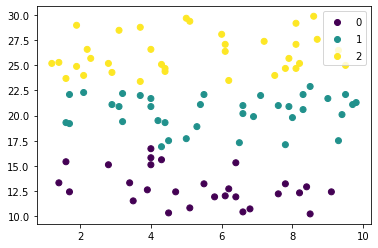

In [22]:
scatter = plt.scatter(data.iloc[:,0].values,data.iloc[:,1].values,c = k_means_model(data,3)[0]) #行列分别为明今温差、后今温差，颜色为天气标签
plt.legend(*scatter.legend_elements()) #显示图例
plt.show()

In [17]:
# def literate_k_means(data, k, epoch=100, n_init=10):
#     """
#     建模10次kmeans，并获取结果最好的那一组结果
#     """
    
#     tries = np.array([k_means_model(data, k) for _ in range(n_init)])
#     least_cost_idx = np.argmin(tries[:, -1])

#     return tries[least_cost_idx]

# scikit-learn用法

In [23]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=1)
predic = model.fit_predict(data)

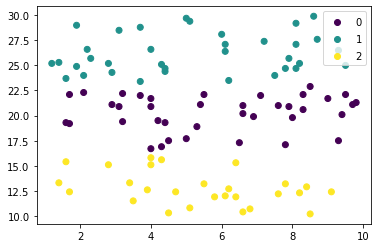

In [24]:
scatter = plt.scatter(data['x1'],data['x2'],c=predic) 
plt.legend(*scatter.legend_elements()) #显示图例
plt.show()